<a href="https://colab.research.google.com/github/Ru-Yin/Practice_Leetcode/blob/main/BioPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Function Summary

### Sequence Operations
- **Bio.Seq**
  - `Seq`: for handling biological sequences
  - `reverse_complement()`: get the reverse complement of a sequence
  - `translate()`: translate a nucleotide sequence to a protein sequence

In [3]:
# prompt: install Biopython code

!pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 51.5 MB/s eta 0:00:00


In [4]:
# prompt: create some data examples for the Bio.Seq lib

from Bio.Seq import Seq

# Example 1: DNA sequence
dna_seq = Seq("ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG")
print("DNA sequence:", dna_seq)

# Example 2: Reverse complement of DNA sequence
reverse_complement_seq = dna_seq.reverse_complement()
print("Reverse complement:", reverse_complement_seq)

# Example 3: Translate DNA sequence to protein sequence
protein_seq = dna_seq.translate()
print("Protein sequence:", protein_seq)

# Example 4: RNA sequence
rna_seq = Seq("AUGGCCAUUGUAAUGGGCCGCUGAAAGGGUGCCCGAUAG")
print("RNA sequence:", rna_seq)

# Example 5: Reverse complement of RNA sequence
reverse_complement_rna = rna_seq.reverse_complement()
print("Reverse complement RNA:", reverse_complement_rna)

DNA sequence: ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG
Reverse complement: CTATCGGGCACCCTTTCAGCGGCCCATTACAATGGCCAT
Protein sequence: MAIVMGR*KGAR*
RNA sequence: AUGGCCAUUGUAAUGGGCCGCUGAAAGGGUGCCCGAUAG
Reverse complement RNA: CTATCGGGCACCCTTTCAGCGGCCCATTACAATGGCCAT


### File Input/Output
- **Bio.SeqIO**
  - `parse()`: parse sequences from a file
  - `read()`: read a single sequence from a file
  - `write()`: write sequences to a file

- **Bio.AlignIO**
  - `read()`: read alignments from a file
  - `write()`: write alignments to a file

In [ ]:
# prompt: create some data examples for the Bio.SeqIO lib (parse( ), read( ), write( ))

from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq

# Create a sample FASTA file with two sequences
with open("sequences.fasta", "w") as f:
  f.write(">seq1\nATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG\n")
  f.write(">seq2\nCGTAATGCGTAGCATGCGTAGCTAGCTAGCTAG\n")

# Example 1: Parse sequences from a FASTA file
for record in SeqIO.parse("sequences.fasta", "fasta"):
  print(record.id)
  print(record.seq)

# Example 2: Read a single sequence from a FASTA file
record = SeqIO.read("sequences.fasta", "fasta")
print(record.id)
print(record.seq)

# Example 3: Create a SeqRecord and write it to a file
new_record = SeqRecord(
    Seq("ATGCGTAGCTAGCATGCGTAGCTAGCATGC"),
    id="seq3",
    name="seq3",
    description="A new sequence",
)
with open("new_sequence.fasta", "w") as f:
  SeqIO.write(new_record, f, "fasta")

In [ ]:
# prompt: create some data examples for the Bio.AlignIO lib

from Bio import AlignIO
from Bio.Align import MultipleSeqAlignment
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq


# Example 1: Creating a simple alignment from strings

alignment_strings = [
    "ATGCGT",
    "ATGCCT",
    "ATGGCT"
]

alignment = MultipleSeqAlignment([
    SeqRecord(Seq(seq), id=f"seq_{i+1}") for i, seq in enumerate(alignment_strings)
])

#print(alignment)
# Example 2: Writing to a FASTA format file

AlignIO.write(alignment, "example_alignment.fasta", "fasta")

# Example 3: Reading from a FASTA format file


alignment = AlignIO.read("example_alignment.fasta", "fasta")
print(alignment)

# Example 4: Creating an alignment from SeqRecord objects

records = [
    SeqRecord(Seq("ATGCGT"), id="seq1"),
    SeqRecord(Seq("ATGCCT"), id="seq2"),
    SeqRecord(Seq("ATGGCT"), id="seq3"),
]
alignment = MultipleSeqAlignment(records)

#print(alignment)

# Example 5: Writing alignment to a Clustal format file
AlignIO.write(alignment, "example_alignment.clustal", "clustal")

# Example 6: Reading an alignment from a Clustal format file

alignment = AlignIO.read("example_alignment.clustal", "clustal")
alignment

### Sequence Alignment
- **Bio.pairwise2**
  - `align.globalxx()`: perform global alignment
  - `align.localxx()`: perform local alignment

In [ ]:
# prompt: example usage of Bio.pairwise2
# align.globalxx(): perform global alignment
# align.localxx(): perform local alignment

from Bio.pairwise2 import align
from Bio.Seq import Seq

# Define two sequences to align
seq1 = Seq("ATGCGT")
seq2 = Seq("ATGCCT")

# Perform global alignment using the globalxx function
alignments = align.globalxx(seq1, seq2)

# Print the alignment results
for alignment in alignments:
  print(alignment)
  print("Score:", alignment.score)
  print("Alignment:")
  print(alignment.seqA)
  print(alignment.seqB)
  print("---")

# Perform local alignment using the localxx function
alignments = align.localxx(seq1, seq2)

# Print the alignment results
for alignment in alignments:
  print(alignment)
  print("Score:", alignment.score)
  print("Alignment:")
  print(alignment.seqA)
  print(alignment.seqB)
  print("---")

### Database Access
- **Bio.Entrez**
  - `esearch()`: search for entries in Entrez databases
  - `efetch()`: fetch entries from Entrez databases

In [ ]:
# prompt: example usage of Bio.Entrez
# esearch(): search for entries in Entrez databases (such as NCBI)
# efetch(): fetch entries from Entrez databases

from Bio import Entrez

# Provide your email address to NCBI
Entrez.email = "your_email@example.com"

# Example 1: Search for articles related to "COVID-19" in PubMed
handle = Entrez.esearch(db="pubmed", term="COVID-19", retmax=10)
record = Entrez.read(handle)
handle.close()

# Get the list of PubMed IDs (PMIDs)
id_list = record["IdList"]
print("PubMed IDs:", id_list)

# Example 2: Fetch the abstracts for the found articles
handle = Entrez.efetch(db="pubmed", id=id_list, rettype="abstract", retmode="text")
abstract_text = handle.read()
handle.close()
print("Abstracts:\n", abstract_text)



### Phylogenetic Analysis
- **Bio.Phylo**
  - `read()`: read a phylogenetic tree
  - `draw()`: visualize the phylogenetic tree

Tree(rooted=False, weight=1.0)
    Clade()
        Clade()
            Clade(name='A')
            Clade(name='B')
        Clade()
            Clade(name='C')
            Clade(name='D')


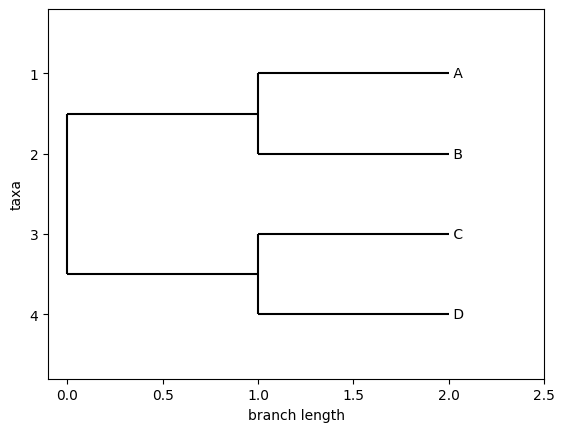

In [13]:
# prompt: example usage of Bio.Phylo
# read(): read a phylogenetic tree
# draw(): visualize the phylogenetic tree

# 創建一個示例系統發生樹文件
with open("example_tree.nwk", "w") as f:
    f.write("((A,B),(C,D));")

from Bio import Phylo
import matplotlib.pyplot as plt

# 1. 讀取樹文件
tree = Phylo.read("example_tree.nwk", "newick")

# 2. 輸出樹的基本結構
print(tree)

# 3. 視覺化系統發生樹
Phylo.draw(tree)
plt.show()  # 可選，僅在腳本中需要


## Homework

Here’s a homework set based on the **Cluster Analysis** chapter of the Biopython tutorial, totaling 100 points.

1. **Data Representation (10 points)**
   - Explain how `Bio.Cluster` represents data for clustering.
   - Task: Create a sample data array and define a mask to handle missing values. Demonstrate how `Bio.Cluster` would use these.

In [10]:
# prompt: Data Representation (10 points)
# Explain how Bio.Cluster represents data for clustering.
# Task: Create a sample data array and define a mask to handle missing values.
# Demonstrate how Bio.Cluster would use these.

from Bio import Cluster
import numpy as np

# Sample data array (e.g., gene expression data)
data = np.array([
    [1.0, 2.0, 3.0, 4.0],
    [5.0, 6.0, 7.0, 8.0],
    [9.0, 10.0, np.nan, 12.0],  # Example of missing value
    [13.0, 14.0, 15.0, 16.0]
])
print(data)

# Mask for missing values (NaN)
mask = np.isnan(data)
print("Mask", mask)

# Replace missing values with a placeholder (e.g., mean of the column)
for i in range(data.shape[1]):
    col_mean = np.nanmean(data[:, i])
    data[mask[:, i], i] = col_mean
print(data)


# How Bio.Cluster would use this:
# 1. The `distancematrix` function can accept the data array and calculate a distance matrix.
# 2. The mask (or handling of missing values) is important because distance calculations should
#    not be affected by missing data.
# 3. The `kcluster` or `hcluster` functions can be used for clustering using the pre-calculated
#    distance matrix or using the data itself.

# Example using k-means clustering (ignoring missing value handling for simplicity)
# distanceMatrix = Cluster.distancematrix(data)
# clusters = Cluster.kcluster(data, nclusters=2)
# print(clusters)

# Note:
# This illustrates a basic representation and how missing values should be handled.
# Bio.Cluster's functionality might vary slightly depending on specific distance metrics and
# clustering algorithms used.

[[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. nan 12.]
 [13. 14. 15. 16.]]
Mask [[False False False False]
 [False False False False]
 [False False  True False]
 [False False False False]]
[[ 1.          2.          3.          4.        ]
 [ 5.          6.          7.          8.        ]
 [ 9.         10.          8.33333333 12.        ]
 [13.         14.         15.         16.        ]]


2. **Distance Functions (20 points)**
   - Explain two distance metrics (e.g., Euclidean and City-block) and two distance functions based on correlations (e.g., Pearson and Spearman).
   - Task: Write a Python function using `Bio.Cluster` to calculate these distances between two given gene expression profiles. Include sample data for demonstration.

3. **Distance Matrix (10 points)**
   - Describe the process of creating a distance matrix using `Bio.Cluster`.
   - Task: Generate a distance matrix for a small dataset of at least five rows.

4. **K-means and K-medoids Clustering (20 points)**
   - Explain the differences between \( k \)-means and \( k \)-medoids clustering.
   - Task: Apply \( k \)-means and \( k \)-medoids clustering to a dataset using `Bio.Cluster` and interpret the resulting clusters.

5. **Hierarchical Clustering (15 points)**
   - Describe how hierarchical clustering is implemented in `Bio.Cluster`.
   - Task: Use hierarchical clustering with a dataset to create a dendrogram. Discuss the linkage method used and interpret the clusters formed.

6. **Self-Organizing Maps (10 points)**
   - Explain Self-Organizing Maps (SOMs) and their application.
   - Task: Use `Bio.Cluster` to perform SOM on a dataset and interpret the clustering result.

7. **Principal Component Analysis (PCA) (15 points)**
   - Describe the role of PCA in cluster analysis.
   - Task: Apply PCA to reduce the dimensions of a dataset. Visualize and interpret the first two principal components.